# 마켓 데이터 분석 02 - 시가 총액 분석

<img width="320" src="http://i.imgur.com/Y5twMcc.jpg" >


### 2018 FinanceData http://fb.com/financedata

In [1]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(16, 4))

# Windows 경우
fp = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf")

# MacOS 경우
fp = fm.FontProperties(fname="/Users/plusjune/Library/Fonts/NanumGothic.ttf")

# 우분투에 나눔글꼴 설치한 경우 (c9.io) 
fp = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

In [2]:
import numpy as np
import pandas as pd

# 거래소 시가총액 순위 페이지
시장정보 → 주식 → 순위정보 → 시가총액 상/하위

<img width="80%" src="http://i.imgur.com/bVphJQF.png" >
    

# 년도별 시가총액 데이터

http://gist.github.com/d5c30a3377d43cd53884

년도 | CSV
-- | --
1995 | https://goo.gl/bKLFfZ
1996 | https://goo.gl/frDCXn
1997 | https://goo.gl/JtAl21
1998 | https://goo.gl/JRfYRD
1999 | https://goo.gl/Facbjh
2000 | https://goo.gl/WfvKjW
2001 | https://goo.gl/zNSKar
2002 | https://goo.gl/lx33Ru
2003 | https://goo.gl/EBRGeQ
2004 | https://goo.gl/zmkvOH
2005 | https://goo.gl/KhcfUd
2006 | https://goo.gl/2R3HKe
2007 | https://goo.gl/Anzx04
2008 | https://goo.gl/TToVRU
2009 | https://goo.gl/5HtSuz
2010 | https://goo.gl/83BEuB
2011 | https://goo.gl/2ZRCqu
2012 | https://goo.gl/Rlfhjr
2013 | https://goo.gl/Ikxu5H
2014 | https://goo.gl/HZs8ua
2015 | https://goo.gl/9geJey


* 데이터 URL (1995년 ~ 2015년, 21개)
* 파일당 약 1100~2200 행(row)

# krx-marcap-with-sector.csv

* https://gist.github.com/financedata/c88008a77031ac0f0b20
* (shorten) https://goo.gl/ujleWV

In [3]:
df = pd.read_csv("https://goo.gl/ujleWV", dtype={'code':str})
df.head()

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
0,1,015760,한국전력,18.994194,0.134566,1995-12-01,KEPCO,전기가스,KOSPI
1,2,005930,삼성전자,7.665979,0.054310,1995-12-01,Samsung Electronics,전기전자,KOSPI
2,3,005490,POSCO,4.760822,0.033728,1995-12-01,POSCO,철강금속,KOSPI
3,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01,SK Telecom,통신업,KOSPI
4,5,000200,대우중공업,3.019233,0.021390,1995-12-01,NaN,NaN,NaN


# 필요한 컬럼만 추출

In [4]:
df2 = df[['code', 'name', 'marcap', 'sector']]
df2.head(10)

,code,name,marcap,sector
0,015760,한국전력,18.994194,전기가스
1,005930,삼성전자,7.665979,전기전자
2,005490,POSCO,4.760822,철강금속
3,017670,SK텔레콤,3.229820,통신업
4,000200,대우중공업,3.019233,NaN
5,002610,엘지전자,2.147247,NaN
6,015940,데이콤,1.621128,NaN
7,000720,현대건설,1.595383,건설업
8,015580,신한은행,1.568640,NaN
9,005931,삼성전자(1신),1.492631,NaN


# 개수를 구하기
* Series.value_counts() 는 고유한 값의 개수를 구하는 간편한 방법을 제공
* 업종(sector)의 고유한 값의 개수

In [5]:
sector_counts = df2['sector'].value_counts()
print (sector_counts.count()) # 업종수: 80
print (sector_counts.index) # 업종항목: 자동차부품, 화학, 기계, 제약 등 ...
print (sector_counts.values) # 업종내 기업수: 120, 109, 98, 95 ...

64
Index(['화학', '서비스업', '전기전자', 'IT부품', '반도체', '유통업', '운수장비', '금속', '철강금속', '의약품',
       '음식료', '기계,장비', '건설업', '비금속', '도매', '기계', '증권', '운송장비,부품', '제약', '통신장비',
       '섬유의복', '소프트웨어', '종이목재', '미분류', '일반전기전자', '운수창고', '디지털컨텐츠', '음식료,담배',
       '의료,정밀기기', '컴퓨터서비스', '전문기술', '보험업', '오락,문화', '금융', '정보기기', '종합건설',
       '전기가스', '섬유,의류', '전문건설', '사업지원', '종이,목재', '기타금융업', '출판,매체복제', '통신서비스',
       '인터넷', '기타제조', '소매', '금융서비스', '방송서비스', '교육', '연구,개발', '환경', '의료정밀',
       '통신업', '부동산', '육상운송', '은행', '여행운송', '기타서비스', '숙박,음식', '전기,가스', '농업',
       '자동차판매', '비금속광업'],
      dtype='object')
[2376 2132 1139 1134  968  952  930  855  852  847  822  754  738  716  716
  644  635  630  621  576  475  465  456  453  420  406  344  303  299  292
  287  268  234  230  228  208  182  177  174  169  161  145  133  119  117
  111  109   99   96   77   69   67   66   55   54   52   52   32   24   20
   18   14   12    1]


# 색상 테이블, 해쉬
업종별로 색상 테이블

In [6]:
from itertools import cycle
colors_list = [ "#C41F3B", "#FF7D0A", "#ABD473", "#69CCF0", "#00FF96", "#F58CBA",
"#FFFFFF", "#FFF569", "#0070DE", "#9482C9", "#C79C6E" ]
color = cycle(colors_list)
print (next(color))
print (next(color))
print (next(color))

#C41F3B
#FF7D0A
#ABD473


# 업종 분포 차트

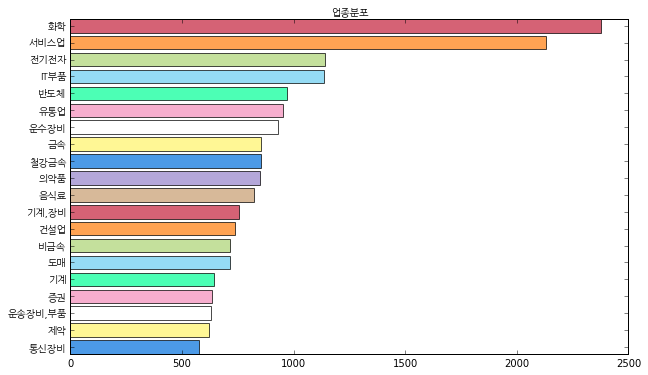

In [7]:
top20 = sector_counts[0:20]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('업종분포', fontproperties=fp)
pos = np.arange(20)
pos = pos[::-1] # reverse pos list
plt.yticks(pos, [x for x in top20.index], fontproperties=fp)
plt.barh(pos, top20.values, align='center', color=colors_list, alpha=0.7)
plt.show()

# 특정 섹터만 추출

In [8]:
df_semi = df[df['sector']=='소프트웨어']
df_semi.head(10)

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
1646,525,030520,한글과컴퓨터,0.040192,0.000322,1996-12-01,Haansoft Inc.,소프트웨어,KOSDAQ
3348,646,032850,비트컴퓨터,0.013825,0.000177,1997-12-01,BIT Computer,소프트웨어,KOSDAQ
3483,781,030520,한글과컴퓨터,0.009360,0.000120,1997-12-01,Haansoft Inc.,소프트웨어,KOSDAQ
3622,920,032620,유비케어,0.006136,0.000079,1997-12-01,UBCare,소프트웨어,KOSDAQ
4719,651,032850,비트컴퓨터,0.013300,0.000091,1998-12-01,BIT Computer,소프트웨어,KOSDAQ
4724,656,030520,한글과컴퓨터,0.013050,0.000090,1998-12-01,Haansoft Inc.,소프트웨어,KOSDAQ
4902,834,032620,유비케어,0.006710,0.000046,1998-12-01,UBCare,소프트웨어,KOSDAQ
5371,28,030520,한글과컴퓨터,2.526725,0.005544,1999-12-01,Haansoft Inc.,소프트웨어,KOSDAQ
5469,126,032620,유비케어,0.355371,0.000780,1999-12-01,UBCare,소프트웨어,KOSDAQ
5511,168,032850,비트컴퓨터,0.238985,0.000524,1999-12-01,BIT Computer,소프트웨어,KOSDAQ


# 업종별 시가총액 차트

In [9]:
df_2015 = df[df['year'] == '2015-12-01']
df_2015.head()

,rank,code,name,marcap,marcap_pct,year,name_en,sector,market
34501,1,005930,삼성전자,190.752641,0.130428,2015-12-01,Samsung Electronics,전기전자,KOSPI
34502,2,005380,현대차,33.371887,0.022818,2015-12-01,Hyundai Motor,운수장비,KOSPI
34503,3,015760,한국전력,32.290793,0.022079,2015-12-01,KEPCO,전기가스,KOSPI
34504,4,028260,삼성물산,27.979281,0.019131,2015-12-01,Samsung C&T Corporation,유통업,KOSPI
34505,5,005935,삼성전자우,24.888435,0.017018,2015-12-01,Samsung Electronics,전기전자,KOSPI


In [10]:
# pivot_table(): 
piv = df_2015.pivot_table(index=['sector'], values='marcap', aggfunc=np.sum)

# 복사본을 만들고, 값 기준으로 내림차순 소트
sector_marcap = piv.copy()
sector_marcap.sort_values(by='marcap', ascending=False, inplace=True)
sector_marcap.head(20)

,marcap
sector,
전기전자,287.875933
서비스업,194.308660
화학,151.888602
운수장비,120.701497
유통업,85.366612
보험업,61.112385
기타금융업,57.289581
철강금속,41.355757
음식료,39.491417


'sector'(업종)으로 인덱스를 생성, 'marcap'(시가총액)을 값으로 하되 동일한 업종은 합산(np.sum)

<Container object of 20 artists>

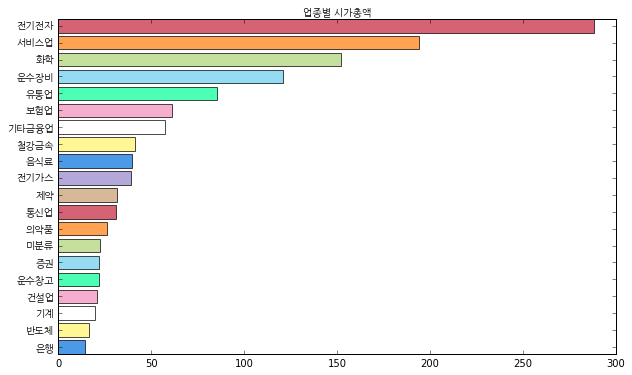

In [11]:
top20 = sector_marcap[0:20]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('업종별 시가총액', fontproperties=fp)

pos = range(20)
pos = pos[::-1] # reverse pos list
plt.yticks(pos, [x for x in top20.index], fontproperties=fp)
plt.barh(pos, top20.values, align='center', color=colors_list, alpha=0.7)

# 업종별 시가총액 비중

In [12]:
sector_marcap_pct = sector_marcap / sector_marcap.sum()
sector_marcap_pct[:10]

,marcap
sector,
전기전자,0.197459
서비스업,0.133280
화학,0.104183
운수장비,0.082791
유통업,0.058554
보험업,0.041918
기타금융업,0.039296
철강금속,0.028367
음식료,0.027088


전기전자 0.197 즉, 시장 시가총액의 약 20% 차지

In [13]:
print (sector_counts.index[:10])
print (sector_counts.values[:10])
print ('=' * 60)
print (sector_marcap.index[:10])
print (sector_marcap.values[:10])


Index(['화학', '서비스업', '전기전자', 'IT부품', '반도체', '유통업', '운수장비', '금속', '철강금속',
       '의약품'],
      dtype='object')
[2376 2132 1139 1134  968  952  930  855  852  847]
Index(['전기전자', '서비스업', '화학', '운수장비', '유통업', '보험업', '기타금융업', '철강금속', '음식료',
       '전기가스'],
      dtype='object', name='sector')
[[ 287.875933]
 [ 194.30866 ]
 [ 151.888602]
 [ 120.701497]
 [  85.366612]
 [  61.112385]
 [  57.289581]
 [  41.355757]
 [  39.491417]
 [  39.087887]]


In [14]:
sector_counts[:10]

화학      2376
서비스업    2132
전기전자    1139
IT부품    1134
반도체      968
유통업      952
운수장비     930
금속       855
철강금속     852
의약품      847
Name: sector, dtype: int64

In [15]:
sector_marcap[:10]

,marcap
sector,
전기전자,287.875933
서비스업,194.308660
화학,151.888602
운수장비,120.701497
유통업,85.366612
보험업,61.112385
기타금융업,57.289581
철강금속,41.355757
음식료,39.491417


# 시가총액 비중 차트(파이)

In [16]:
sector_marcap['marcap'][:10]

sector
전기전자     287.875933
서비스업     194.308660
화학       151.888602
운수장비     120.701497
유통업       85.366612
보험업       61.112385
기타금융업     57.289581
철강금속      41.355757
음식료       39.491417
전기가스      39.087887
Name: marcap, dtype: float64

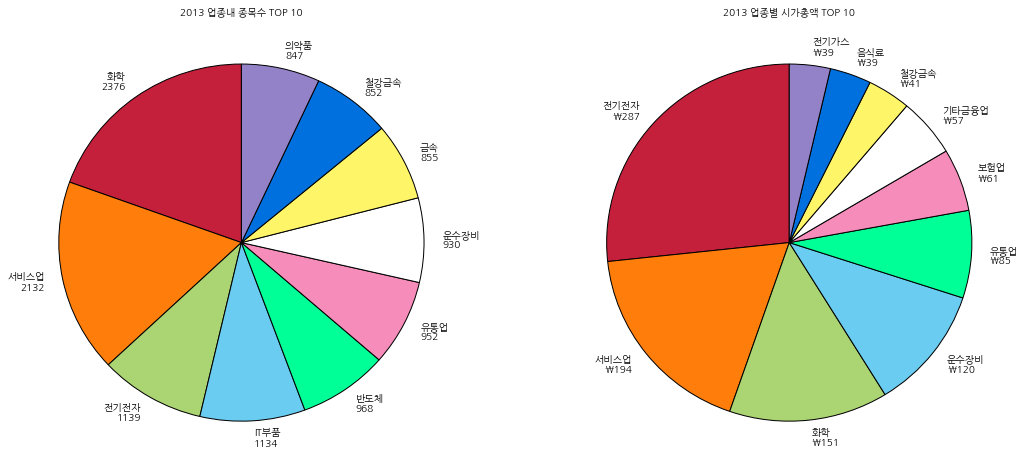

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 8)

# 첫번째 파이 차트 (업종내 종목수)
labels = []
sec_stock_top = sector_counts[:10]
for i,val in sec_stock_top.items():
    labels.append("%s\n%d" % (i,val))

axes[0].set_title("2013 업종내 종목수 TOP 10", fontproperties=fp)
patches, texts = axes[0].pie(sec_stock_top, labels=labels, startangle=90, colors=colors_list)
plt.setp(texts, fontproperties=fp)

# 두번째 파이 차트 (업종별 시가총액)
labels = []
sec_mar_top = sector_marcap['marcap'][:10]
for i, val in sec_mar_top.items():
    labels.append("%s\n\%d" % (i, val))
axes[1].set_title(u"2013 업종별 시가총액 TOP 10", fontproperties=fp)
patches, texts = axes[1].pie(sec_mar_top, labels=labels, startangle=90, colors=colors_list)
plt.setp(texts, fontproperties=fp)

plt.show()

# 20년간 (1995년 ~ 2015년) 시가총액 분석

* 시가총액 30위권을 지킨 기업은 9개 <br>
(삼성전자, 현대차, 한국전력, 기아차, SK텔레콤, POSCO, 삼성화재, LG, S-Oil)
* 1995년의 시총 1위 기업은 한국전력(18.9조), 2015년에는 삼성전자(190.7조)
* 1998년 말까지 한국전력 1위, 1999년 이후 삼성전자가 부동의 1위 (18년째)
* 1995년의 삼성전자 시가총액 비중은 5.4% 에서 2015년에는 13% 로 커졌다.
* 시가총액 순위가 떨어진 기업은 SK텔레콤 4위 → 15위, 포스코 3위 → 18위
* 역대 시총 2위는 POSCO, SK텔레콤, 현대차 등 소수 종목들이 번갈아
* 최상위 종목을 제외하고는 30위권 내 순위변동 극심 <br>
(한국경제의 성장 및 위기에 따라 업종 및 종목간 부침)



----
### 2018 FinanceData http://fb.com/financedata http://financedata.github.com